# RSM8415 Assignment 4 (Organ Transplant)

In [1]:
pip install ciw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.8/93.8 kB 1.8 MB/s eta 0:00:00


In [2]:
import ciw
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd ,seaborn as sns, numpy as np ,matplotlib.pyplot as plt

In [3]:
import math

##### x! ##########
def factorial(x):
    if (x == 1) or (x==0):
        return 1
    else:
        # recursive call to the function
        return (x * factorial(x-1))

###################
def user_defined_sum(c,𝜌):
    sum = 0
    for n in range(c):
        sum += (c*𝜌)**n/factorial(n)

    return 1/(sum + (c*𝜌)**c/(factorial(c)*(1-𝜌)))

##### M/M/c ##########
def m_m_c(𝜆,µ,c):
    𝜌 = 𝜆/(c*µ)
    p0 = user_defined_sum(c,𝜌)
    lq = (c*𝜌)**c*p0*𝜌/(factorial(c)*(1-𝜌)**2)
    wq = lq/𝜆
    L = lq + 𝜆/µ
    W=L/𝜆
    return(𝜌,p0,lq,wq,L,W)

Define G/G/C for question 3

In [4]:
######## G/G/C ###########
def g_g_c(s,cv_s,a,cv_a,c):

    𝜌 = s/(c*a) #utilization rate
    wq = s/c * (cv_a**2+cv_s**2)/2 * 𝜌**(-1+math.sqrt(2*(c+1)))/(1- 𝜌)

    service_time = s
    W = wq + s
    L = W * 𝜆
    lq = wq * 𝜆
    return(𝜌,lq,wq,L,W)

# Question 1
What is the current level of activity in the queuing systems of Toronto and London? This includes factors like their utilization rate, wait times, and the length of their wait lists. Provide your thoughts on the findings (employ steady-state analytical methods to evaluate the performance of the systems).

In [5]:
l_arrival = 109.025
l_service = 110.047
t_arrival = 327.259
t_service = 327.514



In [6]:
# London
𝜆 = l_arrival  #arrival rate
µ = l_service    # service rate

𝜌,p0,lq,wq,L,W = m_m_c(𝜆,µ,c=1)
print("London - current level of activity")
print('Avg. Time in queue:{}'.format(round(wq,3)))
print('Avg. Time in the system:{}'.format(round(W,3)))
print('Utilization Rate in system:{}'.format(round(𝜌,3)))
print('Avg. Waitlist Length in system:{}'.format(round(lq,3)))



London - current level of activity
Avg. Time in queue:0.969
Avg. Time in the system:0.978
Utilization Rate in system:0.991
Avg. Waitlist Length in system:105.687


In [7]:
# Toronto
𝜆 = t_arrival
µ = t_service

𝜌,p0,lq,wq,L,W = m_m_c(𝜆,µ,c=1)
print("Toronto - current level of activity")
print('Avg. Time in queue:{}'.format(round(wq,3)))
print('Avg. Time in the system:{}'.format(round(W,3)))
print('Utilization Rate in system:{}'.format(round(𝜌,3)))
print('Avg. Waitlist Length in system:{}'.format(round(lq,3)))

Toronto - current level of activity
Avg. Time in queue:3.919
Avg. Time in the system:3.922
Utilization Rate in system:0.999
Avg. Waitlist Length in system:1282.369


## Findings:
The utilization rate in both cities are almost 100%. The waitlist length in Toronto is almost 10 times longer than in London. The average wait time in Toronto is 4 times longer than in London.

# Question 2
 Create three different queuing system designs and assess their performance compared to the existing setup. Determine which design would be most advantageous for the patients. Share your insights on the outcomes  (employ steady-state analytical methods to evaluate the performance of the systems).

## Queuing system design 1: Pooled Arrival

In [8]:
# Pooled Arrival

𝜆 = (l_arrival+ t_arrival)
µ = (l_service + t_service)/2

𝜌,p0,lq,wq,L,W = m_m_c(𝜆,µ,c=2)
print("Pooled Arrival")
print('Avg. Time in queue:{}'.format(round(wq,3)))
print('Avg. Time in the system:{}'.format(round(W,3)))
print('Utilization Rate in system:{}'.format(round(𝜌,3)))
print('Avg. Waitlist Length in system:{}'.format(round(lq,3)))


Pooled Arrival
Avg. Time in queue:0.78
Avg. Time in the system:0.784
Utilization Rate in system:0.997
Avg. Waitlist Length in system:340.153


## Queuing system design 2: Pooled Service
Note: In order to ensure fairness of the system, the two queues will be served by the server proportional to how long the two queues are.

In [9]:
# Pooled Service
𝜆 = l_arrival
µ = (l_arrival/(l_arrival+t_arrival)) * (t_service+ l_service)

𝜌,p0,lq,wq,L,W = m_m_c(𝜆,µ,c=1)
print("Pooled Service - London")
print('Avg. Time in queue:{}'.format(round(wq,3)))
print('Avg. Time in the system:{}'.format(round(W,3)))
print('Utilization Rate in system:{}'.format(round(𝜌,3)))
print('Avg. Waitlist Length in system:{}'.format(round(lq,3)))

print("---------------------")

𝜆 = t_arrival
µ = (t_arrival/(l_arrival+t_arrival)) * (t_service+ l_service)

𝜌,p0,lq,wq,L,W = m_m_c(𝜆,µ,c=1)
print("Pooled Service - Toronto")
print('Avg. Time in queue:{}'.format(round(wq,3)))
print('Avg. Time in the system:{}'.format(round(W,3)))
print('Utilization Rate in system:{}'.format(round(𝜌,3)))
print('Avg. Waitlist Length in system:{}'.format(round(lq,3)))


Pooled Service - London
Avg. Time in queue:3.125
Avg. Time in the system:3.134
Utilization Rate in system:0.997
Avg. Waitlist Length in system:340.651
---------------------
Pooled Service - Toronto
Avg. Time in queue:1.041
Avg. Time in the system:1.044
Utilization Rate in system:0.997
Avg. Waitlist Length in system:340.651


## Queuing system design 3: Pooled Arrival and Pooled Service

In [10]:
# Pooled Arrival and Service
𝜆 = l_arrival+ t_arrival
µ = t_service+ l_service

𝜌,p0,lq,wq,L,W = m_m_c(𝜆,µ,c=1)
print("Pooled Arrival and Pooled Service")
print('Avg. Time in queue:{}'.format(round(wq,3)))
print('Avg. Time in the system:{}'.format(round(W,3)))
print('Utilization Rate in system:{}'.format(round(𝜌,3)))
print('Avg. Waitlist Length in system:{}'.format(round(lq,3)))

Pooled Arrival and Pooled Service
Avg. Time in queue:0.781
Avg. Time in the system:0.783
Utilization Rate in system:0.997
Avg. Waitlist Length in system:340.651


## Insights on the outcomes:

Both Pooled Arrival and Pooled Arrival and Pooled Service can improve the performance across the board - time in the system reduced and waitlists shorter.

The optimal solution is Pooled Arrival.

# Question 3
 Conduct discrete event simulations to evaluate how variability in both arrival and service processes affects the original waitlist and the proposed design from question 2.

## Steady State Analytical - Original Dedicated Queues with CV (of Arrival and Service) Increase

In [11]:
arrival_pool = t_arrival
service_separate = t_service
cv = 1.25
c = 1

𝜌,lq,wq,L,W = g_g_c(s=1/t_service,cv_s= cv, a = 1/t_arrival, cv_a = cv,c=c)
print("Toronto - Dedicated Queue")
print('Avg. Time in queue:{}'.format(round(wq,3)))
print('Avg. Time in the system:{}'.format(round(W,3)))
print('Utilization Rate in system:{}'.format(round(𝜌,3)))
print('Avg. Waitlist Length in system:{}'.format(round(lq,3)))
print('Avg number of customer in system:{}'.format(round(L,3)))

Toronto - Dedicated Queue
Avg. Time in queue:6.123
Avg. Time in the system:6.126
Utilization Rate in system:0.999
Avg. Waitlist Length in system:2671.227
Avg number of customer in system:2672.56


In [12]:
arrival_pool = l_arrival
service_separate = l_service
cv = 1.25
c = 1

𝜌,lq,wq,L,W = g_g_c(s=1/l_service,cv_s= cv, a = 1/l_arrival, cv_a = cv,c=c)
print("London - Dedicated Queue")
print('Avg. Time in queue:{}'.format(round(wq,3)))
print('Avg. Time in the system:{}'.format(round(W,3)))
print('Utilization Rate in system:{}'.format(round(𝜌,3)))
print('Avg. Waitlist Length in system:{}'.format(round(lq,3)))
print('Avg number of customer in system:{}'.format(round(L,3)))

London - Dedicated Queue
Avg. Time in queue:1.515
Avg. Time in the system:1.524
Utilization Rate in system:0.991
Avg. Waitlist Length in system:660.825
Avg number of customer in system:664.789


## Simulation - Original Dedicated Queues with CV (of Arrival and Service) Increase

In [13]:
# Toronto
decimal = 4

alpha = (1/cv)**2
beta_arrival = 1/ (alpha * t_arrival)
beta_service = 1/ (alpha * t_service)
c = 1

N = ciw.create_network(
    arrival_distributions=[ciw.dists.Gamma(shape = alpha, scale = beta_arrival)],
    service_distributions=[ciw.dists.Gamma(shape = alpha, scale = beta_service)],
    number_of_servers=[c])

#Set a seed
#ciw.seed(100)

#Initiate the simulation into Q
Q = ciw.Simulation(N, tracker=ciw.trackers.SystemPopulation())

# Stopping Criteria
#Q.simulate_until_max_time(100)
Q.simulate_until_max_customers(200000)

#Get the results
recs = Q.get_all_records()
df = pd.DataFrame(recs)
df.sort_values(by='arrival_date',inplace=True)
df['inter_arrival'] = df.arrival_date - df.arrival_date.shift(1,fill_value=0)
df['system_time'] = df.exit_date - df.arrival_date
df.shape
df[['id_number','server_id','arrival_date','waiting_time','service_start_date','server_id','service_time','service_end_date','exit_date','queue_size_at_arrival','queue_size_at_departure']]


,id_number,server_id,arrival_date,waiting_time,service_start_date,server_id,service_time,service_end_date,exit_date,queue_size_at_arrival,queue_size_at_departure
0,1,1,0.002062,0.000000,0.002062,1,0.004167,0.006229,0.006229,0,2
1,2,1,0.004601,0.001628,0.006229,1,0.000182,0.006411,0.006411,1,1
2,3,1,0.005645,0.000766,0.006411,1,0.002168,0.008579,0.008579,2,1
3,4,1,0.008514,0.000065,0.008579,1,0.006109,0.014688,0.014688,1,1
4,5,1,0.010811,0.003877,0.014688,1,0.000672,0.015360,0.015360,1,0
...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,1,612.206111,0.515330,612.721441,1,0.000205,612.721646,612.721646,188,181
199996,199997,1,612.211858,0.509788,612.721646,1,0.003302,612.724947,612.724947,189,182
199997,199998,1,612.235631,0.489316,612.724947,1,0.000773,612.725720,612.725720,185,181
199998,199999,1,612.236068,0.489652,612.725720,1,0.006859,612.732579,612.732579,186,182


<Axes: xlabel='id_number', ylabel='queue_size_at_arrival'>

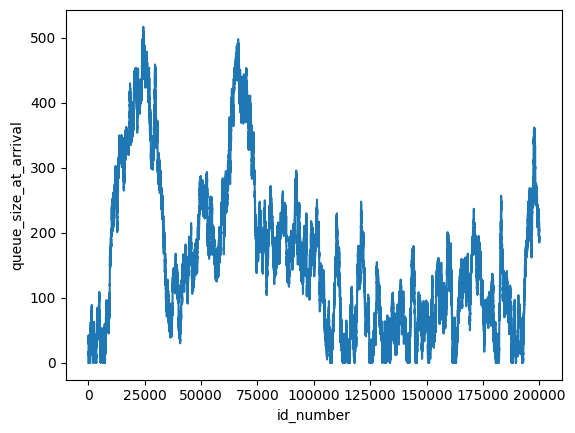

In [14]:
sns.lineplot(x = df['id_number'], y = df['queue_size_at_arrival'])

In [15]:
n = len(df['waiting_time'])
cutoff = 0.25
print("Toronto - Dedicated Queue Waitlist")
df['queue_size_at_arrival'].mean()


Toronto - Dedicated Queue Waitlist


160.630565

In [16]:
# London
decimal = 4

alpha = (1/cv)**2
beta_arrival = 1/ (alpha * l_arrival)
beta_service = 1/ (alpha * l_service)
c = 1

N = ciw.create_network(
    arrival_distributions=[ciw.dists.Gamma(shape = alpha, scale = beta_arrival)],
    service_distributions=[ciw.dists.Gamma(shape = alpha, scale = beta_service)],
    number_of_servers=[c])

#Set a seed
#ciw.seed(100)

#Initiate the simulation into Q
Q = ciw.Simulation(N, tracker=ciw.trackers.SystemPopulation())

# Stopping Criteria
#Q.simulate_until_max_time(100)
Q.simulate_until_max_customers(200000)

#Get the results
recs = Q.get_all_records()
df = pd.DataFrame(recs)
df.sort_values(by='arrival_date',inplace=True)
df['inter_arrival'] = df.arrival_date - df.arrival_date.shift(1,fill_value=0)
df['system_time'] = df.exit_date - df.arrival_date
df.shape
df[['id_number','server_id','arrival_date','waiting_time','service_start_date','server_id','service_time','service_end_date','exit_date','queue_size_at_arrival','queue_size_at_departure']]


,id_number,server_id,arrival_date,waiting_time,service_start_date,server_id,service_time,service_end_date,exit_date,queue_size_at_arrival,queue_size_at_departure
0,1,1,0.000210,0.000000,0.000210,1,0.003209,0.003419,0.003419,0,0
1,2,1,0.008571,0.000000,0.008571,1,0.009931,0.018502,0.018502,0,0
2,3,1,0.029267,0.000000,0.029267,1,0.005127,0.034394,0.034394,0,2
3,4,1,0.029835,0.004559,0.034394,1,0.053561,0.087955,0.087955,1,7
4,5,1,0.030555,0.057400,0.087955,1,0.005235,0.093191,0.093191,2,7
...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,1,1836.909254,1.166277,1838.075531,1,0.002010,1838.077542,1838.077542,138,154
199996,199997,1,1836.909334,1.168208,1838.077542,1,0.004688,1838.082230,1838.082230,139,153
199997,199998,1,1836.917974,1.164257,1838.082230,1,0.001130,1838.083361,1838.083361,140,152
199998,199999,1,1836.918410,1.164951,1838.083361,1,0.026149,1838.109510,1838.109510,140,154


<Axes: xlabel='id_number', ylabel='queue_size_at_arrival'>

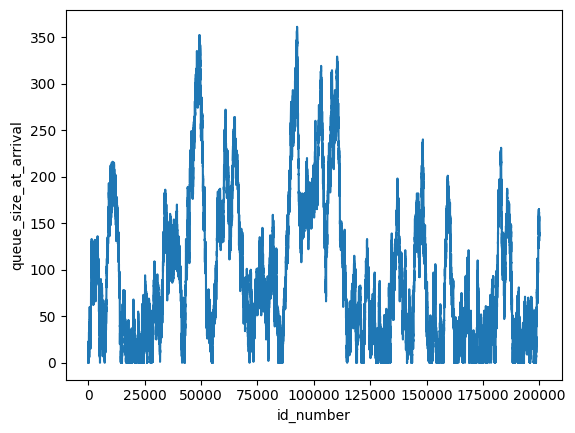

In [17]:
sns.lineplot(x = df['id_number'], y = df['queue_size_at_arrival'])

In [18]:
n = len(df['waiting_time'])
print("London - Dedicated Queue Waitlist")
df['queue_size_at_arrival'].mean()


London - Dedicated Queue Waitlist


95.17581

## Steady State Analytical - Pooled Arrival with CV (of Arrival and Service) Increase

In [19]:
arrival_pool = (l_arrival+ t_arrival)
service_separate = (l_service + t_service)/2
cv = 1.25
c = 2

𝜌,lq,wq,L,W = g_g_c(s=1/service_separate,cv_s= cv, a = 1/arrival_pool, cv_a = cv,c=c)
print("Pooled Arrival and Service")
print('Avg. Time in queue:{}'.format(round(wq,3)))
print('Avg. Time in the system:{}'.format(round(W,3)))
print('Utilization Rate in system:{}'.format(round(𝜌,3)))
print('Avg. Waitlist Length in system:{}'.format(round(lq,3)))
print('Avg number of customer in system:{}'.format(round(L,3)))


Pooled Arrival and Service
Avg. Time in queue:1.218
Avg. Time in the system:1.223
Utilization Rate in system:0.997
Avg. Waitlist Length in system:531.568
Avg number of customer in system:533.562


## Simulation - Pooled Arrival with CV (of Arrival and Service) Increase

In [20]:
decimal = 4

alpha = (1/cv)**2
beta_arrival = 1/ (alpha * arrival_pool)
beta_service = 1/ (alpha * service_separate)

N = ciw.create_network(
    arrival_distributions=[ciw.dists.Gamma(shape = alpha, scale = beta_arrival)],
    service_distributions=[ciw.dists.Gamma(shape = alpha, scale = beta_service)],
    number_of_servers=[c])

#Set a seed
ciw.seed(100)

#Initiate the simulation into Q
Q = ciw.Simulation(N, tracker=ciw.trackers.SystemPopulation())

# Stopping Criteria
#Q.simulate_until_max_time(100)
Q.simulate_until_max_customers(100000)

#Get the results
recs = Q.get_all_records()
df = pd.DataFrame(recs)
df.sort_values(by='arrival_date',inplace=True)
df['inter_arrival'] = df.arrival_date - df.arrival_date.shift(1,fill_value=0)
df['system_time'] = df.exit_date - df.arrival_date
df.shape
df[['id_number','server_id','arrival_date','waiting_time','service_start_date','server_id','service_time','service_end_date','exit_date','queue_size_at_arrival','queue_size_at_departure']]


,id_number,server_id,arrival_date,waiting_time,service_start_date,server_id,service_time,service_end_date,exit_date,queue_size_at_arrival,queue_size_at_departure
0,1,1,0.000246,0.000000,0.000246,1,0.000193,0.000438,0.000438,0,1
4,2,2,0.000289,0.000000,0.000289,2,0.016292,0.016581,0.016581,1,5
1,3,1,0.001086,0.000000,0.001086,1,0.000828,0.001914,0.001914,1,2
2,4,1,0.001454,0.000460,0.001914,1,0.005052,0.006966,0.006966,2,4
3,5,1,0.005200,0.001766,0.006966,1,0.002836,0.009802,0.009802,2,3
...,...,...,...,...,...,...,...,...,...,...,...
99994,99996,1,227.527863,2.782483,230.310346,1,0.001843,230.312189,230.312189,1117,1166
99995,99997,1,227.528935,2.783254,230.312189,1,0.001846,230.314035,230.314035,1118,1165
99996,99998,1,227.534303,2.779732,230.314035,1,0.007158,230.321193,230.321193,1116,1167
99999,99999,1,227.534437,2.786756,230.321193,1,0.007427,230.328620,230.328620,1117,1164


<Axes: xlabel='id_number', ylabel='queue_size_at_arrival'>

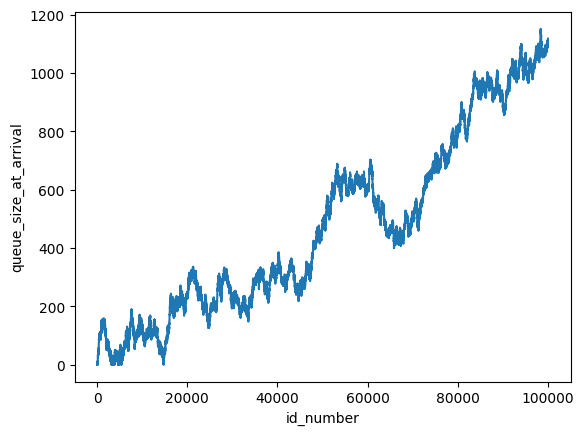

In [21]:
sns.lineplot(x = df['id_number'], y = df['queue_size_at_arrival'])

In [22]:
n = len(df['waiting_time'])
print("Pooled Arrival and Service Waitlist")
df['queue_size_at_arrival'].mean()


Pooled Arrival and Service Waitlist


474.91796

## Comments:
We can see that if both arrival and service have greater variability (in our case it is CV=1.25), the waitlist will get longer under both original plan (dedicated queue) and pooled arrival design (the best solution in Question 2).

# Question 4
 Explore the potential consequences for the original waitlist if patient arrivals were to increase by 5%. Utilize both simulation techniques and steady-state analytical solutions to analyze the scenario.

## Simulation


In [23]:
decimal = 4
c = 1


N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=l_arrival*1.05)],
    service_distributions=[ciw.dists.Exponential(rate=l_service)],
    number_of_servers=[c])

#ciw.seed(0)


Q = ciw.Simulation(N, tracker=ciw.trackers.SystemPopulation())

# Stopping Criteria
Q.simulate_until_max_customers(100000)

recs = Q.get_all_records()
df = pd.DataFrame(recs)
df.sort_values(by='arrival_date',inplace=True)
df['inter_arrival'] = df.arrival_date - df.arrival_date.shift(1,fill_value=0)
df['system_time'] = df.exit_date - df.arrival_date
df.shape
df[['id_number','server_id','arrival_date','waiting_time','service_start_date','server_id','service_time','service_end_date','exit_date','queue_size_at_arrival','queue_size_at_departure']]


,id_number,server_id,arrival_date,waiting_time,service_start_date,server_id,service_time,service_end_date,exit_date,queue_size_at_arrival,queue_size_at_departure
0,1,1,0.000015,0.000000,0.000015,1,0.001886,0.001900,0.001900,0,1
1,2,1,0.000967,0.000933,0.001900,1,0.002102,0.004002,0.004002,1,0
2,3,1,0.008277,0.000000,0.008277,1,0.000228,0.008505,0.008505,0,0
3,4,1,0.017362,0.000000,0.017362,1,0.003198,0.020560,0.020560,0,0
4,5,1,0.029400,0.000000,0.029400,1,0.004416,0.033816,0.033816,0,1
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,1,878.295920,29.165389,907.461310,1,0.008115,907.469425,907.469425,3192,3368
99996,99997,1,878.297305,29.172120,907.469425,1,0.005790,907.475215,907.475215,3193,3367
99997,99998,1,878.304270,29.170944,907.475215,1,0.012013,907.487227,907.487227,3194,3369
99998,99999,1,878.309367,29.177860,907.487227,1,0.006304,907.493531,907.493531,3195,3369


In [24]:

n = len(df['waiting_time'])
cutoff = 0.2
print("London - Dedicated Queue Waitlist - Arrival increase 5%")
df['queue_size_at_arrival'].mean()


London - Dedicated Queue Waitlist - Arrival increase 5%


1613.02816

In [25]:
# Check the waitlist length under different number of max_customers
for x in np.arange(10000,110000,10000):
  Q = ciw.Simulation(N, tracker=ciw.trackers.SystemPopulation())
  Q.simulate_until_max_customers(x)

  recs = Q.get_all_records()
  df = pd.DataFrame(recs)
  df.sort_values(by='arrival_date',inplace=True)
  df['inter_arrival'] = df.arrival_date - df.arrival_date.shift(1,fill_value=0)
  df['system_time'] = df.exit_date - df.arrival_date

  n = len(df['waiting_time'])
  cutoff = 0.2
  print("London - Dedicated Queue Waitlist - Arrival increase 5%")
  print("max customer is:", x)
  waitlist_len = df['queue_size_at_arrival'][round(n*cutoff): -round(n*cutoff)].mean()
  print("length of waitlist is:", waitlist_len)


London - Dedicated Queue Waitlist - Arrival increase 5%
max customer is: 10000
length of waitlist is: 270.3263333333333
London - Dedicated Queue Waitlist - Arrival increase 5%
max customer is: 20000
length of waitlist is: 458.03433333333334
London - Dedicated Queue Waitlist - Arrival increase 5%
max customer is: 30000
length of waitlist is: 807.8997222222222
London - Dedicated Queue Waitlist - Arrival increase 5%
max customer is: 40000
length of waitlist is: 912.8648333333333
London - Dedicated Queue Waitlist - Arrival increase 5%
max customer is: 50000
length of waitlist is: 848.3831
London - Dedicated Queue Waitlist - Arrival increase 5%
max customer is: 60000
length of waitlist is: 872.5732222222222
London - Dedicated Queue Waitlist - Arrival increase 5%
max customer is: 70000
length of waitlist is: 1403.9099523809523
London - Dedicated Queue Waitlist - Arrival increase 5%
max customer is: 80000
length of waitlist is: 1364.156125
London - Dedicated Queue Waitlist - Arrival increase 

## Analytical

Note: We added additional constraint to the M/M/C formula below to let utilization rate < 100%, because the service rate - organ donors arrivals, will not increase to over 100%, which is counter-intuitive.

In [26]:
##### x! ##########
def factorial(x):
    if (x == 1) or (x==0):
        return 1
    else:
        # recursive call to the function
        return (x * factorial(x-1))

###################
def user_defined_sum(c,𝜌):
    sum = 0
    for n in range(c):
        sum += (c*𝜌)**n/factorial(n)

    return 1/(sum + (c*𝜌)**c/(factorial(c)*(1-𝜌)))

##### M/M/c ##########
def m_m_c(𝜆,µ,c):
    𝜌 = min(𝜆/(c*µ),1-(1e-8))
    p0 = user_defined_sum(c,𝜌)
    lq = (c*𝜌)**c*p0*𝜌/(factorial(c)*(1-𝜌)**2)
    wq = lq/𝜆
    L = lq + 𝜆/µ
    W=L/𝜆
    return(𝜌,p0,lq,wq,L,W)

In [27]:
# London
𝜆 = l_arrival*1.05
µ = l_service

𝜌,p0,lq,wq,L,W = m_m_c(𝜆,µ,c=1)
print("Toronto")
print('Avg. Time in queue:{}'.format(round(wq,3)))
print('Avg. Time in the system:{}'.format(round(W,3)))
print('Utilization Rate in system:{}'.format(round(𝜌,3)))
print('Avg. Waitlist Length in system:{}'.format(round(lq,3)))

Toronto
Avg. Time in queue:873543.617
Avg. Time in the system:873543.626
Utilization Rate in system:1.0
Avg. Waitlist Length in system:99999997.498


In [28]:
# Toronto
𝜆 = t_arrival*1.05
µ = t_service

𝜌,p0,lq,wq,L,W = m_m_c(𝜆,µ,c=1)
print("Toronto")
print('Avg. Time in queue:{}'.format(round(wq,3)))
print('Avg. Time in the system:{}'.format(round(W,3)))
print('Utilization Rate in system:{}'.format(round(𝜌,3)))
print('Avg. Waitlist Length in system:{}'.format(round(lq,3)))


Toronto
Avg. Time in queue:291017.49
Avg. Time in the system:291017.493
Utilization Rate in system:1.0
Avg. Waitlist Length in system:99999997.498


Comment:
1. From the simulation, we can see that the waitlist length keeps growing if we increase the number of max_customers. This indicates that the waitlist length will never reach a steady state.
2. From the steady-state analytical solutions, we can see that theoretical waitlist length and average time in queue are both fairly large.
3. The practical implication is that: if the arrival rate increase by 5%, it will overwhelm the system and cause the waitlist to grow longer forever and wait time to be over human being's normal natural life.

# Question 5
 What specific recommendations would you make to improve the system?

## Recommendations

1. Under the current capacity, pool the patients of London and Toronto together and grant them access to a shared pool of organ donors of both cities, while operations are still done separately at London and Toronto facilities.

2. Raise awareness of organ donation to increase the organ donor inflow rate (service rate), in order to relieve the strain on the system (utilization already close to 100%) and to prepare for possible increase in variability (to maintain a stable length of waitlist).